In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# 1.简单练习

输出一个5*/5的单位矩阵

In [2]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# 2.单变量线性回归


## 2.1 Plotting the Data

读入数据，展示数据

In [3]:
path = 'E:\研究生课程\Coursera-ML-AndrewNg-Notes-master\作业\Programming Exercise 1 Linear Regression\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


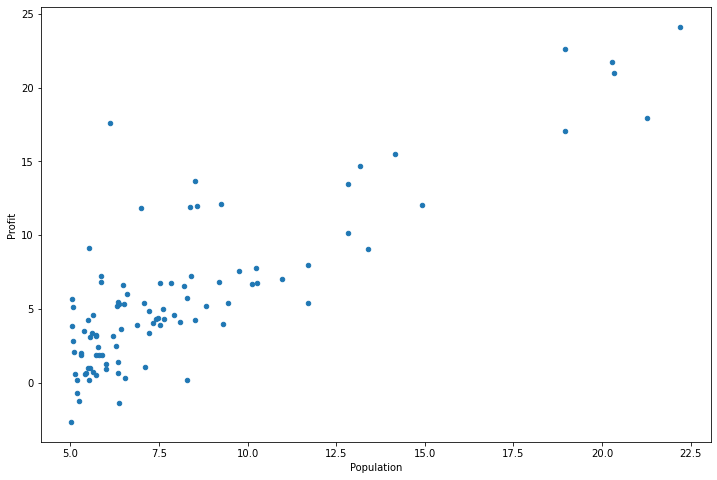

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
plt.show()

## 2.2 梯度下降

在现有数据集上，训练线性回归的参数θ

In [5]:
def computeCost(X, y, theta):
    #X为矩阵，计算J(Ѳ)
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

在训练集中添加一列 来计算代价与梯度

In [6]:
data.insert(0, 'Ones', 1)

变量初始化

In [7]:
cols = data.shape[1]#读取矩阵的长度
X = data.iloc[:,:-1]#X是data中除去最后一列 iloc函数 通过行号来提取数据
y = data.iloc[:,cols-1:cols]#y是data里最后一列

X.head()

In [8]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


转换代价函数矩阵，即转换X，Y，然后才能使用，同时初始化theta=0

In [9]:
X = np.matrix(X)#将X y转换为numpy矩阵
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [10]:
theta

matrix([[0, 0]])

In [11]:
X.shape, theta.shape, y.shape #维度

((97, 2), (1, 2), (97, 1))

计算代价函数

In [12]:
computeCost(X, y, theta)

32.072733877455676

梯度下降

In [13]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])#转换成一个列表
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha) / len(X) * np.sum(term))
        theta = temp #迭代theta
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [14]:
alpha = 0.01 #学习率
iters = 1500 #迭代次数

In [15]:
 g ,cost = gradientDescent(X, y, theta, alpha, iters)

In [16]:
g

matrix([[-3.63029144,  1.16636235]])

In [17]:
predict1 = [1, 3.5] * g.T
print("predict1:", predict1)
predict2 = [1, 7] * g.T
print("predict2:", predict2)

predict1: [[0.45197679]]
predict2: [[4.53424501]]


In [18]:
computeCost(X, y, g) #使用拟合参数计算代价函数

4.483388256587726

绘制线性模型数据

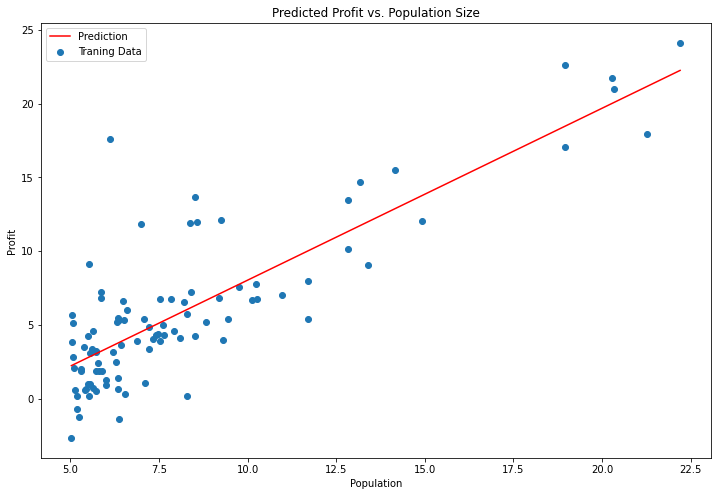

In [19]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)#起始，终止 样本数
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12, 8))#fig为图像对象，ax为坐标轴对象
ax.plot(x, f, 'r', label="Prediction")
ax.scatter(data.Population, data.Profit, label='Traning Data')#设置散点横纵坐标
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

绘制迭代训练中的代价向量

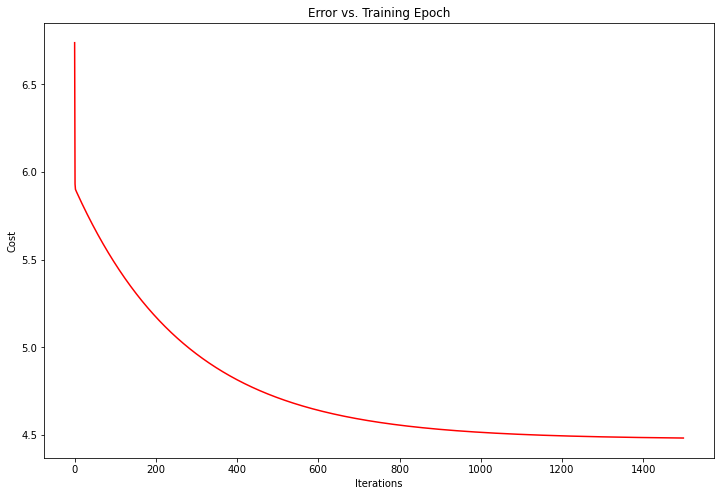

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')#np.arange()返回一个有终点和起点，有固定步长的排列
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Epoch")
plt.show()

# 3.多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [21]:
path = 'E:\研究生课程\Coursera-ML-AndrewNg-Notes-master\作业\Programming Exercise 1 Linear Regression\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


特征归一化

In [22]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


线性回归

In [23]:
data2.insert(0, 'Ones', 1)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]
X2 = np.matrix(X2)
Y2 = np.matrix(y2)
theta2 = np.matrix(np.array([0, 0, 0]))
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
computeCost(X2, y2, g2)

Price    0.130687
dtype: float64

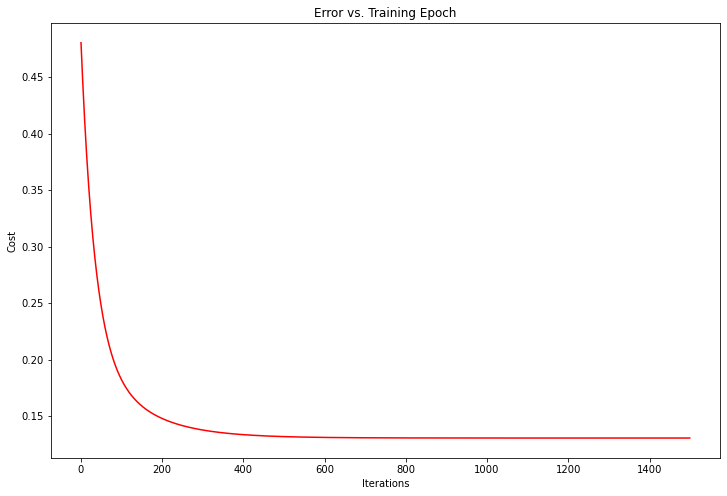

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

调用scikit-learn直接线性回归

In [25]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

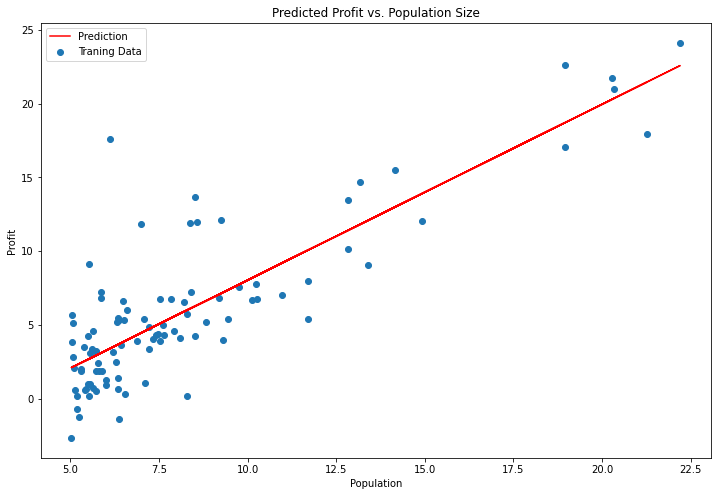

In [26]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4.正规方程

In [27]:
def normalEql(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

final_theta2 = normalEql(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])